In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

In [2]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [10]:
X[102:105], y[102:105]

(array([[5.9, 2.1],
        [5.6, 1.8],
        [5.8, 2.2]]),
 102    2
 103    2
 104    2
 Name: target, dtype: int64)

## Linear SVC, Hard Margin Classifier

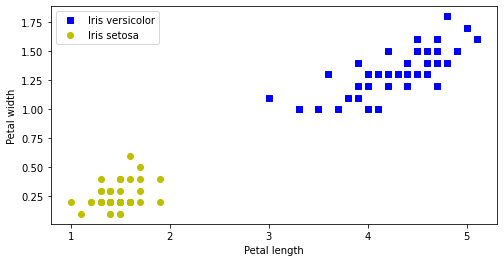

In [13]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

plt.figure(figsize=(8, 4))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor",)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.show()

In [14]:
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
print(w,b)

[1.1 0.7] -3.2799999713897705


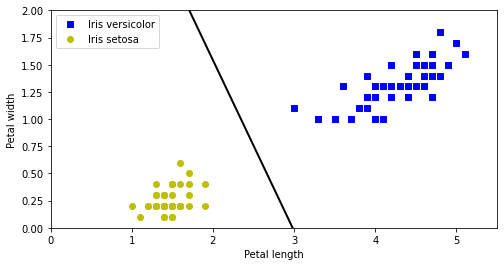

In [15]:
x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0] / w[1] * x0 - b / w[1]

plt.figure(figsize=(8, 4))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor",)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])

plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
plt.show()

In [16]:
svs = svm_clf.support_vectors_
svs

array([[1.9, 0.4],
       [3. , 1.1]])

In [17]:
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

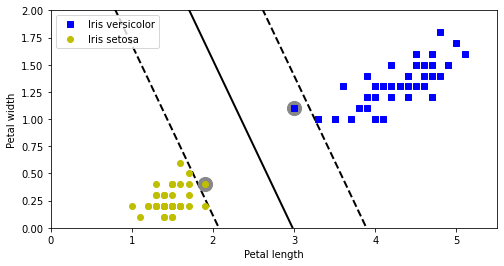

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor",)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])

plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)

plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)

plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='#888',zorder=-1)
plt.show()

## Soft Margin Classifier

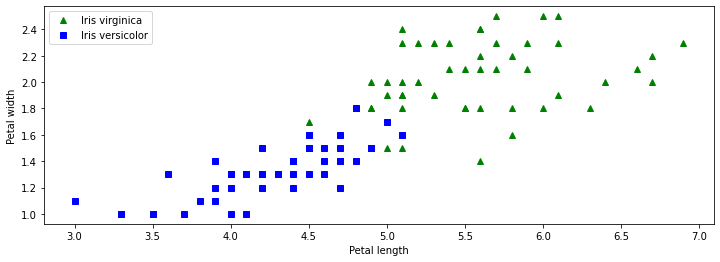

In [19]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target
virginica_or_versicolor = (y == 2) | (y == 1)
X = X[virginica_or_versicolor]
y = y[virginica_or_versicolor]

plt.figure(figsize=(12,4))
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.show()

In [22]:
svm_clf1 = SVC(kernel="linear", C=0.1, random_state=42,)
svm_clf2 = SVC(kernel="linear", C=100, random_state=42)

svm_clf1.fit(X, y)
svm_clf2.fit(X, y)

w1 = svm_clf1.coef_[0]
b1 = svm_clf1.intercept_[0]
print(w1,b1)

w2 = svm_clf2.coef_[0]
b2 = svm_clf2.intercept_[0]
print(w2,b2)

[1.19016375 0.95213016] -7.4265327953597335
[3.99819634 7.98631034] -32.57037899927081


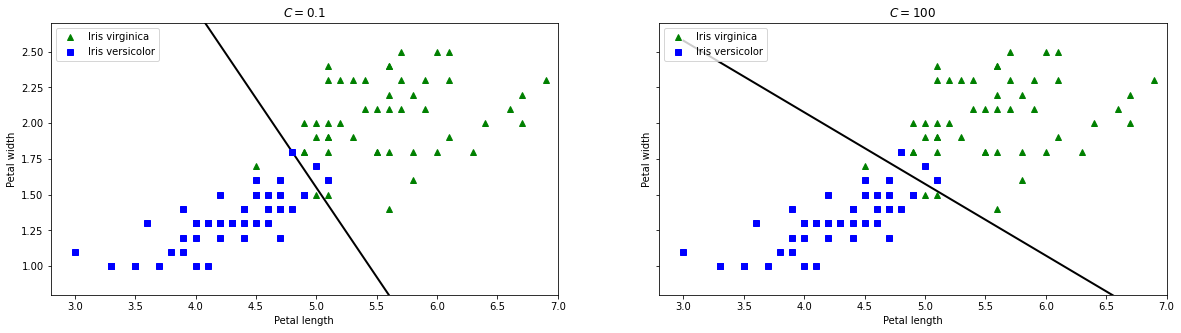

In [23]:
x0 = np.linspace(3, 7.0, 200)
decision_boundary_1 = -w1[0] / w1[1] * x0 - b1 / w1[1]
decision_boundary_2 = -w2[0] / w2[1] * x0 - b2 / w2[1]

fig, axes = plt.subplots(ncols=2, figsize=(20, 5), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(x0, decision_boundary_1, "k-", linewidth=2, zorder=-2)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([2.8, 7, 0.8, 2.7])

plt.sca(axes[1])
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(x0, decision_boundary_2, "k-", linewidth=2, zorder=-2)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([2.8, 7, 0.8, 2.7])

plt.show()

In [24]:
svs1 = svm_clf1.support_vectors_
svs2 = svm_clf2.support_vectors_

margin1 = 1/w1[1]
gutter_up1 = decision_boundary_1 + margin1
gutter_down1 = decision_boundary_1 - margin1

margin2 = 1/w2[1]
gutter_up2 = decision_boundary_2 + margin2
gutter_down2 = decision_boundary_2 - margin2

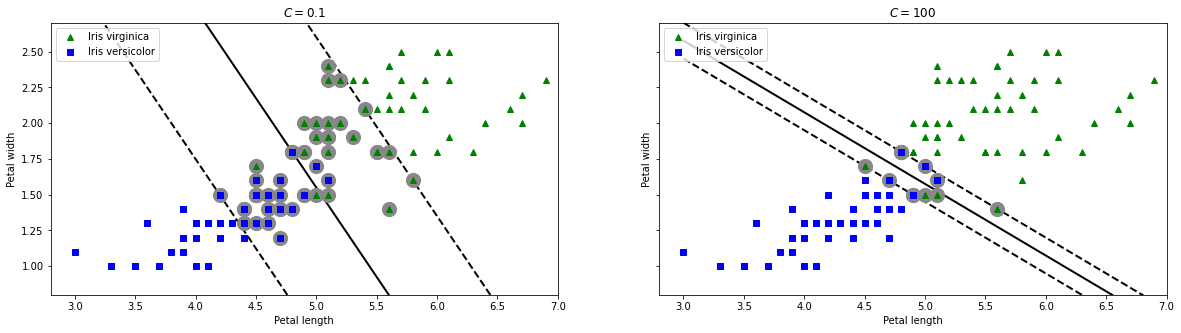

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 5), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(x0, decision_boundary_1, "k-", linewidth=2, zorder=-2)

plt.plot(x0, gutter_up1, "k--", linewidth=2, zorder=-2)
plt.plot(x0, gutter_down1, "k--", linewidth=2, zorder=-2)
plt.scatter(svs1[:, 0], svs1[:, 1], s=200, facecolors='#888',zorder=-1)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([2.8, 7, 0.8, 2.7])

plt.sca(axes[1])
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(x0, decision_boundary_2, "k-", linewidth=2, zorder=-2)

plt.plot(x0, gutter_up2, "k--", linewidth=2, zorder=-2)
plt.plot(x0, gutter_down2, "k--", linewidth=2, zorder=-2)
plt.scatter(svs2[:, 0], svs2[:, 1], s=200, facecolors='#888',zorder=-1)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([2.8, 7, 0.8, 2.7])

plt.show()

## NonLinear SVM Classifier

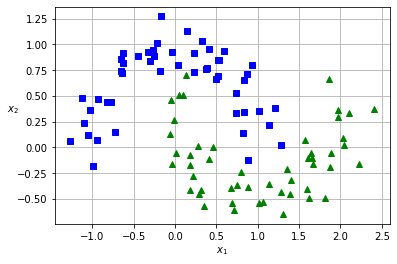

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

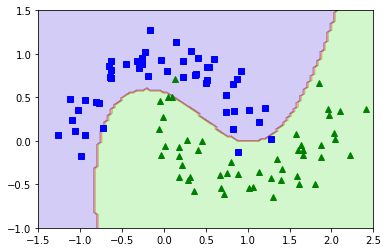

In [38]:
svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=1)
svm_clf.fit(X,y)

x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
x = np.c_[x0.ravel(), x1.ravel()]
y_pred = svm_clf.predict(x).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

plt.show()

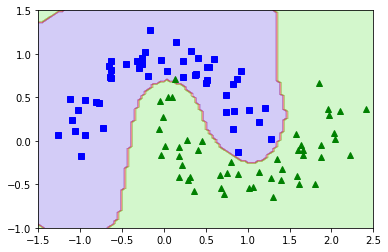

In [44]:
svm_clf = SVC(kernel="rbf", gamma=5, C=20)
svm_clf.fit(X,y)

x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
x = np.c_[x0.ravel(), x1.ravel()]
y_pred = svm_clf.predict(x).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

plt.show()

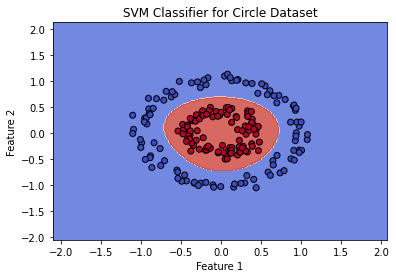

In [49]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, noise=0.07, factor=0.4, random_state=42)
svm_classifier = SVC(kernel='rbf', C=50)
svm_classifier.fit(X, y)

h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Classifier for Circle Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## SVM for Regression

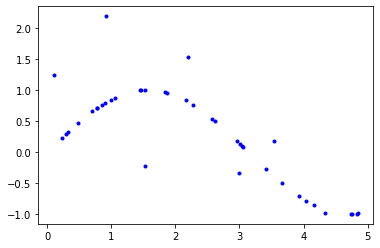

In [54]:
from sklearn.svm import SVR

np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))
plt.plot(X,y, 'b.')
plt.show()

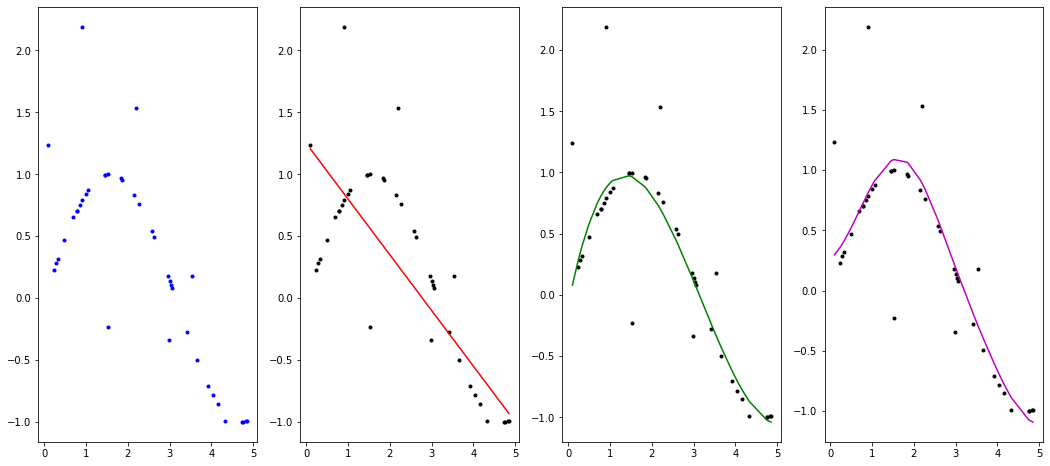

In [56]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.plot(X,y, 'b.')

svr_lin = SVR(kernel="linear", C=1, gamma="auto")
svr_lin.fit(X,y)
y_pred = svr_lin.predict(X)
plt.subplot(1,4,2)
plt.plot(X,y, 'k.')
plt.plot(X, y_pred, 'r-')

svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, coef0=1)
svr_poly.fit(X,y)
y_pred = svr_poly.predict(X)
plt.subplot(1,4,3)
plt.plot(X,y, 'k.')
plt.plot(X, y_pred, 'g-')

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.3)
svr_rbf.fit(X,y)
y_pred = svr_rbf.predict(X)
plt.subplot(1,4,4)
plt.plot(X,y, 'k.')
plt.plot(X, y_pred, 'm-')

plt.show()

## Try out if Possible!

Build a logistic regression and SVM models (linear, poly, rbf) for 

a. Features are Sepal Length and Sepal Width using iris dataset. <br>
b. Use all the four features and build the classifier.